In [1]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
gas = ct.Solution("Jerzembeck.yaml")

In [3]:
Temperature=np.arange(500,1600,50)
Ignition_delay=[]
estimated_ignition_delay_time = np.ones_like(T, dtype=float)
print(Temperature)





NameError: name 'T' is not defined

In [ ]:
for i in Temperature:

    reactor_temperature = i  # Kelvin
    reactor_pressure = 101325  # Pascals

    gas.TP = reactor_temperature, reactor_pressure
    gas.set_equivalence_ratio(phi=1.0, fuel="IXC8H18", oxidizer={"O2": 1, "N2":3.76})

    r = ct.ConstPressureReactor(contents=gas, name="Batch Reactor",energy='on')
    estimated_ignition_delay_time  = 1000
    reactor_network = ct.ReactorNet([r])

    time_history = ct.SolutionArray(gas, extra="t")

    def ignition_delay(states, species):
        i_ign = states(species).Y.argmax()
        return states.t[i_ign]
    reference_species = "oh"

    t0 = time.time()

    t = 0
    #estimated_ignition_delay_time = 20

    counter = 1
    while t < estimated_ignition_delay_time :
        t = reactor_network.step()
        if not counter % 10:
            # We will save only every 10th value. Otherwise, this takes too long
            # Note that the species concentrations are mass fractions
            time_history.append(r.thermo.state, t=t)
        counter += 1

    tau = ignition_delay(time_history, reference_species)

    Ignition_delay.append(tau)

    t1 = time.time()
    print(f"Computed Ignition Delay: {tau:.3e} seconds. Took {t1-t0:3.2f}s to compute, at {i}")

Ignition_delay=np.array(Ignition_delay)


Computed Ignition Delay: 1.043e+03 seconds. Took 0.04s to compute, at 500
Computed Ignition Delay: 9.098e+02 seconds. Took 0.09s to compute, at 550
Computed Ignition Delay: 9.032e+02 seconds. Took 0.21s to compute, at 600
Computed Ignition Delay: 9.970e+02 seconds. Took 0.67s to compute, at 650
Computed Ignition Delay: 1.203e+02 seconds. Took 3.58s to compute, at 700
Computed Ignition Delay: 1.657e+01 seconds. Took 2.82s to compute, at 750
Computed Ignition Delay: 3.169e+00 seconds. Took 3.02s to compute, at 800
Computed Ignition Delay: 8.471e-01 seconds. Took 2.73s to compute, at 850
Computed Ignition Delay: 3.121e-01 seconds. Took 2.55s to compute, at 900
Computed Ignition Delay: 1.311e-01 seconds. Took 2.11s to compute, at 950
Computed Ignition Delay: 5.408e-02 seconds. Took 2.29s to compute, at 1000
Computed Ignition Delay: 2.329e-02 seconds. Took 2.18s to compute, at 1050
Computed Ignition Delay: 1.094e-02 seconds. Took 1.96s to compute, at 1100
Computed Ignition Delay: 5.651e-03 

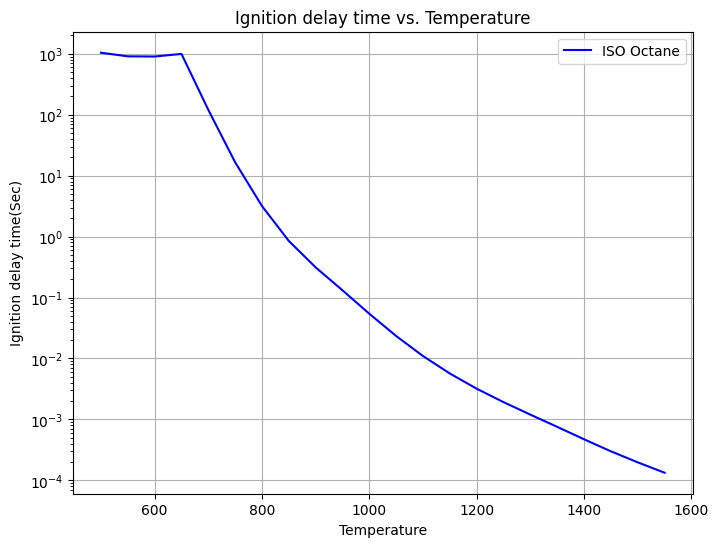

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(Temperature,Ignition_delay, label='ISO Octane', color = 'blue')
plt.xlabel('Temperature')
plt.ylabel('Ignition delay time(Sec)')
plt.title('Ignition delay time vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Temperature_1=np.arange(800,1600,50)
Ignition_delay_1=[]
print(Temperature_1)


[ 800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450
 1500 1550]


In [ ]:
for i in Temperature_1:

    reactor_temperature = i  # Kelvin
    reactor_pressure = 101325  # Pascals

    gas.TP = reactor_temperature, reactor_pressure
    gas.set_equivalence_ratio(phi=1.0, fuel="CH4", oxidizer={"O2": 1, "N2":3.76})

    r = ct.ConstPressureReactor(contents=gas, name="Batch Reactor",energy='on')
    estimated_ignition_delay_time  = 1000
    reactor_network = ct.ReactorNet([r])

    time_history = ct.SolutionArray(gas, extra="t")

    def ignition_delay(states, species):
        i_ign = states(species).Y.argmax()
        return states.t[i_ign]
    reference_species = "oh"

    t0 = time.time()

    t = 0
    #estimated_ignition_delay_time = 20

    counter = 1
    while t < estimated_ignition_delay_time :
        t = reactor_network.step()
        if not counter % 10:
            # We will save only every 10th value. Otherwise, this takes too long
            # Note that the species concentrations are mass fractions
            time_history.append(r.thermo.state, t=t)
        counter += 1

    tau = ignition_delay(time_history, reference_species)

    Ignition_delay_1.append(tau)

    t1 = time.time()
    print(f"Computed Ignition Delay: {tau:.3e} seconds. Took {t1-t0:3.2f}s to compute, at {i}")

Ignition_delay_1=np.array(Ignition_delay_1)


Computed Ignition Delay: 1.455e+02 seconds. Took 5.57s to compute, at 800
Computed Ignition Delay: 2.597e+01 seconds. Took 3.68s to compute, at 850
Computed Ignition Delay: 7.603e+00 seconds. Took 3.97s to compute, at 900
Computed Ignition Delay: 3.180e+00 seconds. Took 3.32s to compute, at 950
Computed Ignition Delay: 1.450e+00 seconds. Took 3.63s to compute, at 1000
Computed Ignition Delay: 6.808e-01 seconds. Took 3.20s to compute, at 1050
Computed Ignition Delay: 3.302e-01 seconds. Took 3.26s to compute, at 1100
Computed Ignition Delay: 1.655e-01 seconds. Took 3.15s to compute, at 1150
Computed Ignition Delay: 8.561e-02 seconds. Took 2.72s to compute, at 1200
Computed Ignition Delay: 4.546e-02 seconds. Took 3.54s to compute, at 1250
Computed Ignition Delay: 2.470e-02 seconds. Took 4.81s to compute, at 1300
Computed Ignition Delay: 1.369e-02 seconds. Took 2.88s to compute, at 1350
Computed Ignition Delay: 7.745e-03 seconds. Took 2.86s to compute, at 1400
Computed Ignition Delay: 4.47

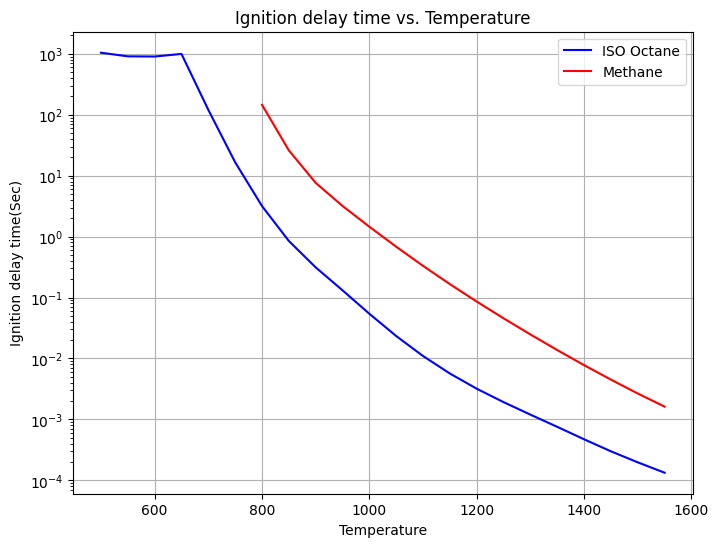

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(Temperature,Ignition_delay, label='ISO Octane', color = 'blue')
plt.semilogy(Temperature_1,Ignition_delay_1, label='Methane', color = 'red')
plt.xlabel('Temperature')
plt.ylabel('Ignition delay time(Sec)')
plt.title('Ignition delay time vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd
import time

In [5]:
gas = ct.Solution("Seiser.yaml")

C:\Users\bhavik\AppData\Local\Temp\ipykernel_10072\3362316807.py:1: UserWarning: NasaPoly2::validate: 
For species c7h15o-1, discontinuity in h/RT detected at Tmid = 1391
	Value computed using low-temperature polynomial:  21.83428060093267
	Value computed using high-temperature polynomial: 21.76699500201913

  gas = ct.Solution("Seiser.yaml")


In [10]:
T = np.hstack((np.arange(1600, 500, -100), np.arange(975, 475, -25)))
estimated_ignition_delay_times = np.ones_like(T, dtype=float)
Ignition_delay=[]
print(T)


[1600 1500 1400 1300 1200 1100 1000  900  800  700  600  975  950  925
  900  875  850  825  800  775  750  725  700  675  650  625  600  575
  550  525  500]


In [14]:
for i in T:

    reactor_temperature = i  # Kelvin
    reactor_pressure = 101325  # Pascals

    gas.TP = reactor_temperature, reactor_pressure
    gas.set_equivalence_ratio(phi=1.0, fuel="nc7h16", oxidizer={"O2": 1, "N2":3.76})

    r = ct.ConstPressureReactor(contents=gas, name="Batch Reactor",energy='on')
    estimated_ignition_delay_times[:6] = 6 * [0.1]
    estimated_ignition_delay_times[-4:-2] = 10
    estimated_ignition_delay_times[-2:] = 100
    estimated_ignition_delay_times[-6:] = 6 * [10000]

    reactor_network = ct.ReactorNet([r])

    time_history = ct.SolutionArray(gas, extra="t")

    def ignition_delay(states, species):
        i_ign = states(species).Y.argmax()
        return states.t[i_ign]
    reference_species = "oh"

    t0 = time.time()

    t = 0
    #estimated_ignition_delay_time = 20

    counter = 1
    while t < estimated_ignition_delay_time :
        t = reactor_network.step()
        if not counter % 10:
            # We will save only every 10th value. Otherwise, this takes too long
            # Note that the species concentrations are mass fractions
            time_history.append(r.thermo.state, t=t)
        counter += 1

    tau = ignition_delay(time_history, reference_species)

    Ignition_delay.append(tau)

    t1 = time.time()
    print(f"Computed Ignition Delay: {tau:.3e} seconds. Took {t1-t0:3.2f}s to compute, at {i}")

Ignition_delay=np.array(Ignition_delay)


Computed Ignition Delay: 5.915e-05 seconds. Took 2.82s to compute, at 1600
Computed Ignition Delay: 1.007e-04 seconds. Took 3.58s to compute, at 1500
Computed Ignition Delay: 2.143e-04 seconds. Took 2.99s to compute, at 1400
Computed Ignition Delay: 5.675e-04 seconds. Took 3.00s to compute, at 1300
Computed Ignition Delay: 1.839e-03 seconds. Took 2.67s to compute, at 1200
Computed Ignition Delay: 7.002e-03 seconds. Took 3.68s to compute, at 1100
Computed Ignition Delay: 3.448e-02 seconds. Took 3.81s to compute, at 1000
Computed Ignition Delay: 2.108e-01 seconds. Took 3.69s to compute, at 900
Computed Ignition Delay: 4.457e-01 seconds. Took 4.88s to compute, at 800


CanteraError: 
*******************************************************************************
CanteraError thrown by CVodesIntegrator::step:
CVodes error encountered. Error code: -3

At t = 0.120586 and h = 6.014e-14, the error test failed repeatedly or with |h| = hmin.
Components with largest weighted error estimates:
84: -119.560563686502
32: 98.11641111087445
55: 7.043395557487511
46: 0.010443266651203221
65: 0.007436622630084746
94: 0.0031025312852436203
54: 0.002723217185051303
89: 0.0025031058630056355
47: 0.0021181433059222314
51: 0.0020804006972055026
*******************************************************************************
